[[147  56  41 ... 114 152 178]
 [113 104  50 ... 132 148 126]
 [ 79 111  41 ... 101  88  80]
 ...
 [142 144 147 ...  81  95  75]
 [155 141 130 ...  74  79  70]
 [ 16   6  15 ...   8   6   2]]
[[201 155 148 ... 184 203 216]
 [184 179 152 ... 193 201 190]
 [167 183 148 ... 178 171 167]
 ...
 [198 199 201 ... 168 175 165]
 [205 198 192 ... 164 167 162]
 [135 130 135 ... 131 130 128]]
img_x.shape = (512, 512)
img_y.shape = (512, 512)
SSIM = 0.7610638192228575


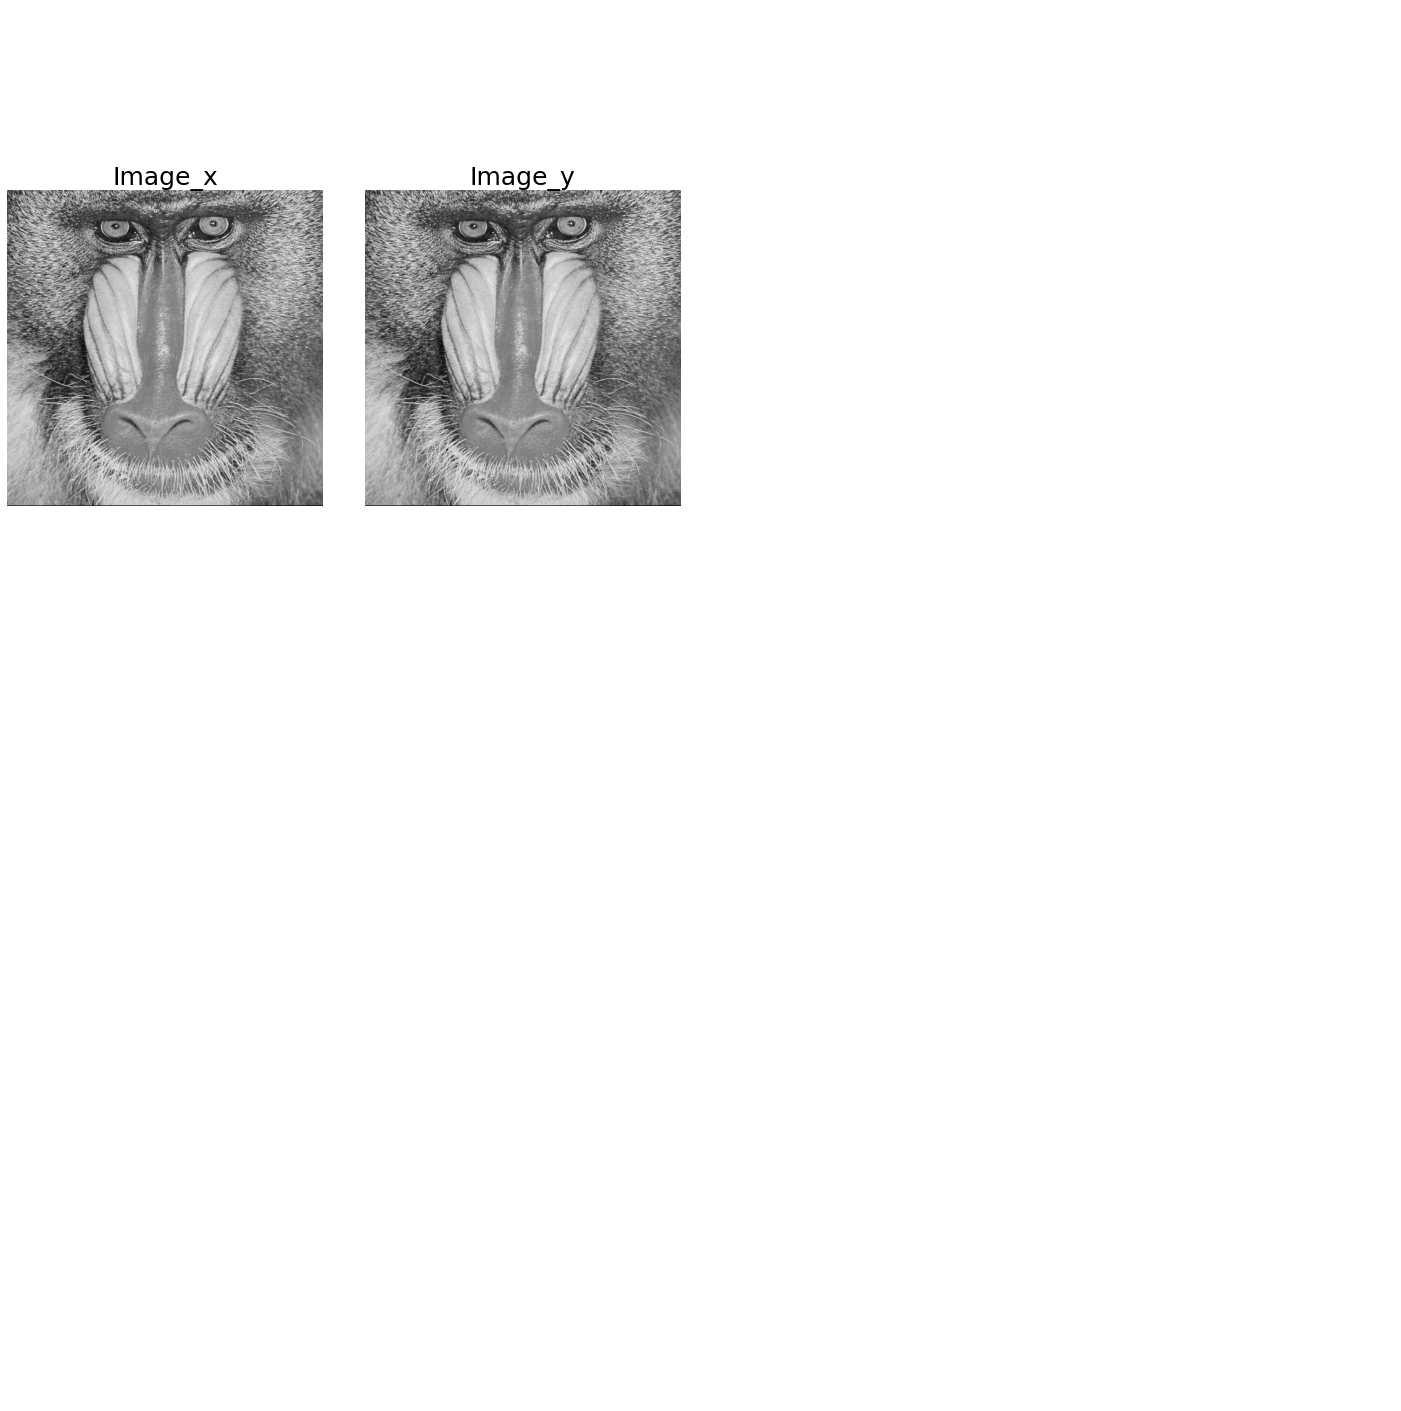

In [29]:
import cv2
from matplotlib import pyplot as plt
from math import sqrt
import numpy as np

img_x = cv2.imread("pic/baboon.jpg", cv2.IMREAD_GRAYSCALE)
img_y = cv2.imread("pic/baboon.jpg", cv2.IMREAD_GRAYSCALE)
# img_y = cv2.imread("pic/bell_peper.jpg", cv2.IMREAD_GRAYSCALE)
img_y = img_y*0.5 + 255.5*0.5
img_y = np.uint8(img_y)
print(img_x)
print(img_y)
#
M, N = img_x.shape
L = 255
c1 = 1/sqrt(L)
c2 = 1/sqrt(L)
# 
mu_x = img_x.mean(axis=0).mean(axis=0)
mu_y = img_y.mean(axis=0).mean(axis=0)
#
# Calculate SSMI
sig_x = np.sum(np.power(img_x - mu_x, 2)) * (1/(M*N))
sig_y = np.sum(np.power(img_y - mu_y, 2)) * (1/(M*N))
sig_xy = np.sum((img_x - mu_x) * (img_y - mu_y)) * (1/(M*N))
# 

ssim = (2*mu_x*mu_y + (c1*L)**2) * \
       (2*sig_xy    + (c2*L)**2) * \
       (mu_x**2 + mu_y**2 + (c1*L)**2)**-1 * \
       (sig_x   + sig_y   + (c2*L)**2)**-1

print(f"SSIM = {ssim}")

fig, ax = plt.subplots(2, 4, figsize=(20, 20))
fig.set_facecolor('white')
fig.tight_layout()
[b.axis('off') for a in ax for b in a ]# Delete all axis
# 
ax[0, 0].set_title("Image_x", fontsize=25)
ax[0, 0].imshow(img_x, cmap='gray')
# 
ax[0, 1].set_title("Image_y", fontsize=25)
ax[0, 1].imshow(img_y, cmap='gray')
